Radius: 0.83149
[[Model]]
    Model(floats)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 290
    # data points      = 85
    # variables        = 9
    chi-square         = 29.0380262
    reduced chi-square = 0.38207929
    Akaike info crit   = -73.2938281
    Bayesian info crit = -51.3099668
[[Variables]]
    c1:  -0.11522909 +/- 0.00437802 (3.80%) (init = -0.12)
    c2:  -6.1011e-06 +/- 12.7546899 (209053869.48%) (init = 0.014)
    c3:   0.13322710 +/- 0.08042371 (60.37%) (init = 0.001)
    ns1:  0.99664492 +/- 0.00213806 (0.21%) (init = 1)
    ns2:  0.99745945 +/- 0.00157629 (0.16%) (init = 1)
    nr:   0.99660077 +/- 0.00142052 (0.14%) (init = 1)
    nb1:  0.98899328 +/- 0.00173671 (0.18%) (init = 1)
    nb2:  0.98738925 +/- 0.00199158 (0.20%) (init = 1)
    nm:   0.99727555 +/- 0.00164129 (0.16%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(c1, nb1)  = -0.860
    C(c1, nm)   = -0.859
    C(c1, ns2)  = -0.842
    C(ns2, nb1

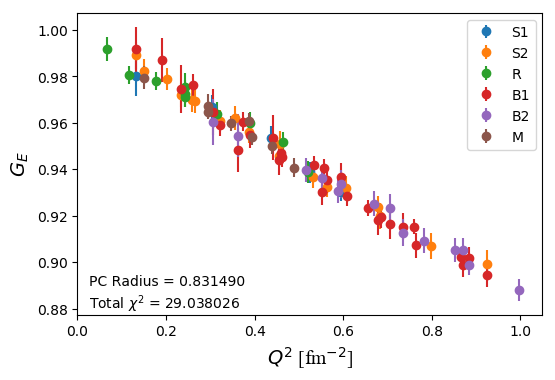

In [5]:
#Graph First Time
%matplotlib inline

##Import Packages
import matplotlib.pyplot as plt
import numpy as np
from lmfit import Model, Parameters
import random

#Float Function for Modeling/Regression
def floats(Q2,c1,c2,c3,ns1,ns2,nr,nb1,nb2,nm):
    f1= ns1*(1+c1*S1[0:,0]+(c2*S1[0:,0])**2+(c3*S1[0:,0])**3)
    f2= ns2*(1+c1*S2[0:,0]+(c2*S2[0:,0])**2+(c3*S2[0:,0])**3)
    f3=  nr*(1+c1*R[0:,0] +(c2*R[0:,0])**2+(c3*R[0:,0])**3)
    f4= nb1*(1+c1*B1[0:,0]+(c2*B1[0:,0])**2+(c3*B1[0:,0])**3)
    f5= nb2*(1+c1*B2[0:,0]+(c2*B2[0:,0])**2+(c3*B2[0:,0])**3)
    f6=  nm*(1+c1*M[0:,0] +(c2*M[0:,0])**2+(c3*M[0:,0])**3)
    return np.concatenate((f1,f2,f3,f4,f5,f6))

##Import Data Files
S1=np.loadtxt('+S1sort.dat')
S2=np.loadtxt('+S2sort.dat')
R =np.loadtxt('+Rsort.dat' )
B1=np.loadtxt('+B1sort.dat')
B2=np.loadtxt('+B2sort.dat')
M =np.loadtxt('+Msort.dat' )

Full_Param_Data=[]
##Generate Values
#Q2
Q2=np.concatenate((S1[0:,0],S2[0:,0],R[0:,0],B1[0:,0],B2[0:,0],M[0:,0]))
#GE
GE=np.concatenate((S1[0:,1],S2[0:,1],R[0:,1],B1[0:,1],B2[0:,1],M[0:,1]))
#Error
Error=np.concatenate((S1[0:,2],S2[0:,2],R[0:,2],B1[0:,2],B2[0:,2],M[0:,2]))
#Coulomb Correction
coulomb_corr=np.concatenate((S1[0:,3],S2[0:,3],R[0:,3],B1[0:,3],B2[0:,3],M[0:,3]))

#Use CC (1 or 0)
Use_CC=0
if Use_CC==1:
    GE=GE+coulomb_corr
                          
##Regression
#Parameters
params = Parameters()
params.add('c1',  value=-0.12,vary=1)
params.add('c2',  value=0.014,vary=1)
params.add('c3',  value=0.001,vary=1)
params.add('ns1', value=1,vary=1)
params.add('ns2', value=1,vary=1)
params.add('nr',  value=1,vary=1)
params.add('nb1', value=1,vary=1)
params.add('nb2', value=1,vary=1)
params.add('nm',  value=1,vary=1)                     
#Result
model=Model(floats)
result=model.fit(GE,Q2=Q2,params=params,weights=1/Error)
#Save Params to List
Real_Params=[]
for name, par in result.params.items():
    Param=round(par.value,5)
    Real_Params.append(Param)
#Fit Report 
print('Radius:',round((((-6*Real_Params[0])**2)**0.25),5))
print(result.fit_report())

##Plot
#Formatting
plt.figure(dpi=100)
plt.annotate('PC Radius = %f'%round((((-6*Real_Params[0])**2)**0.25),5),xy=(0.025,0.89))

plt.annotate('Total $\chi^2$ = %f'%result.chisqr,xy=(0.025,0.88))
#plt.title('$Q^2$ vs $G_E$: Function vs Data Points',fontname='Times New Roman',fontsize=15)
plt.xlabel('$Q^2$ [fm$^{-2}$]',fontname='Times New Roman',fontsize=14)
plt.ylabel('$G_E$',fontname='Times New Roman',fontsize=14)
#Scatter Plot with Error Bars
#With CC
if Use_CC==1:
    plt.errorbar(S1[:,0],(S1[:,1]-S1[:,3])/Real_Params[3],yerr=S1[:,2],fmt='o',label='S1')
    plt.errorbar(S2[:,0],(S2[:,1]-S2[:,3])/Real_Params[4],yerr=S2[:,2],fmt='o',label='S2')
    plt.errorbar(R[:,0],(R[:,1]-R[:,3])/Real_Params[5],yerr=R[:,2],fmt='o',label='R')
    plt.errorbar(B1[:,0],(B1[:,1]-B1[:,3])/Real_Params[6],yerr=B1[:,2],fmt='o',label='B1')
    plt.errorbar(B2[:,0],(B2[:,1]-B2[:,3])/Real_Params[7],yerr=B2[:,2],fmt='o',label='B2')
    plt.errorbar(M[:,0],(M[:,1]-M[:,3])/Real_Params[8],yerr=M[:,2],fmt='o',label='M')
#Without CC
else:
    plt.errorbar(S1[:,0],S1[:,1]/Real_Params[3],yerr=S1[:,2],fmt='o',label='S1')
    plt.errorbar(S2[:,0],S2[:,1]/Real_Params[4],yerr=S2[:,2],fmt='o',label='S2')
    plt.errorbar(R[:,0],R[:,1]/Real_Params[5],yerr=R[:,2],fmt='o',label='R')
    plt.errorbar(B1[:,0],B1[:,1]/Real_Params[6],yerr=B1[:,2],fmt='o',label='B1')
    plt.errorbar(B2[:,0],B2[:,1]/Real_Params[7],yerr=B2[:,2],fmt='o',label='B2')
    plt.errorbar(M[:,0],M[:,1]/Real_Params[8],yerr=M[:,2],fmt='o',label='M')

plt.xlim(0,1.05)
Q2=np.linspace(0,1.05)

#Plot Fit Function
#plt.plot(Q2,1+Real_Params[0]*Q2+Real_Params[1]*Q2**2+Real_Params[2]*Q2**3,color='red')

#Plot Standard Fits
#plt.plot(Q2,1+-0.12873976*Q2+0.014*Q2**2,color='blue',label='With CC')
#plt.plot(Q2,1+-0.12748012*Q2+0.014*Q2**2,color='orange',label='Without CC')

#plt.plot(Q2,1+-0.11984520*Q2+0.00536785*Q2**2,color='blue',label='With CC')
#plt.plot(Q2,1+-0.11484108*Q2+0.00173400*Q2**2,color='orange',label='Without CC')

plt.legend()
plt.show()

Radius: 0.83149
[[Model]]
    Model(floats)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 245
    # data points      = 85
    # variables        = 9
    chi-square         = 29.0380263
    reduced chi-square = 0.38207929
    Akaike info crit   = -73.2938279
    Bayesian info crit = -51.3099666
[[Variables]]
    c1:  -0.11522902 +/- 0.00410975 (3.57%) (init = 0.845)
    c2:  -4.6300e-05 +/- 5.79951484 (12525977.35%) (init = 0.014)
    c3:   0.00236463 +/- 0.00401233 (169.68%) (init = 0.01)
    ns1:  0.99664489 +/- 0.00212830 (0.21%) (init = 1)
    ns2:  0.99745943 +/- 0.00156042 (0.16%) (init = 1)
    nr:   0.99660075 +/- 0.00138448 (0.14%) (init = 1)
    nb1:  0.98899325 +/- 0.00173192 (0.18%) (init = 1)
    nb2:  0.98738922 +/- 0.00197702 (0.20%) (init = 1)
    nm:   0.99727552 +/- 0.00158710 (0.16%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(c1, c3)   = -0.890
    C(c1, nb1)  = -0.878
    C(c1, ns2)  = -0.854
    C(c1, nm)  

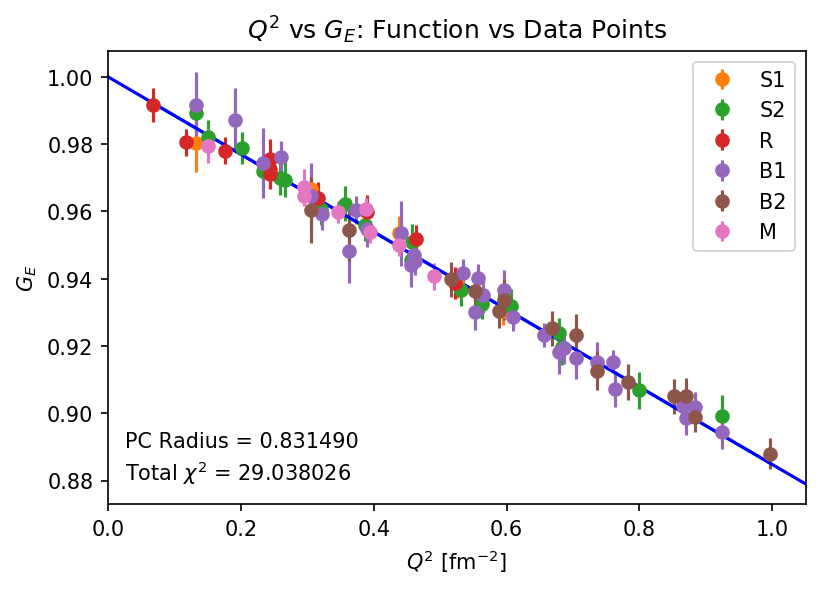

In [11]:
##Import Packages
import random
import matplotlib.pyplot as plt
import numpy as np
from lmfit import Model, Parameters
from scipy.interpolate import interp1d
import seaborn as sns

##Function Storage
#Float Function for Modeling/Regression
def floats(q2,c1,c2,c3,ns1,ns2,nr,nb1,nb2,nm):
    f1= ns1*(1+c1*S1[0:,0]+(c2*S1[0:,0])**2+(c3*S1[0:,0]**3))
    f2= ns2*(1+c1*S2[0:,0]+(c2*S2[0:,0])**2+(c3*S2[0:,0]**3))
    f3=  nr*(1+c1*R[0:,0] +(c2*R[0:,0])**2+(c3*R[0:,0]**3))
    f4= nb1*(1+c1*B1[0:,0]+(c2*B1[0:,0])**2+(c3*B1[0:,0]**3))
    f5= nb2*(1+c1*B2[0:,0]+(c2*B2[0:,0])**2+(c3*B2[0:,0]**3))
    f6=  nm*(1+c1*M[0:,0] +(c2*M[0:,0])**2+(c3*M[0:,0]**3))
    return np.concatenate((f1,f2,f3,f4,f5,f6))

#Read Data Files
S1=np.loadtxt('+S1sort.dat')
S2=np.loadtxt('+S2sort.dat')
R=np.loadtxt('+Rsort.dat')
B1=np.loadtxt('+B1sort.dat')
B2=np.loadtxt('+B2sort.dat')
M=np.loadtxt('+Msort.dat')


##Generate Synthetic Data
#Super Loop (Loops Over Everything)
Loop=1
All_GE=[]
Real_Params=[]
X=0
while X<Loop:
    #Paramaters
    params = Parameters()
    params.add('c1',  value=0.845,vary=1)
    params.add('c2',  value=0.014,vary=1)
    params.add('c3',  value=0.01,vary=1)
    #Gaussian Parameters (MAMI)
    #params.add('c2',  value=random.gauss(2.59/120,0.194/120),vary=0)
    #params.add('c3',  value=random.gauss(-29.8/5040,14.71/5040),vary=0)
    #Fixed Parameters (MAMI)

    #Rosenfelder Parameters
    #params.add('c2', value=0.014,vary=0)
    #params.add('c2', value=random.gauss(0.014,0.004),vary=1)
    #params.add('c3', value=0,vary=0)
    #Normailization Parameters
    params.add('ns1', value=1,vary=1)
    params.add('ns2', value=1,vary=1)
    params.add('nr',  value=1,vary=1)
    params.add('nb1', value=1,vary=1)
    params.add('nb2', value=1,vary=1)
    params.add('nm',  value=1,vary=1)

    #Concatenation
    q2   = np.concatenate((S1[0:,0],S2[0:,0],R[0:,0],B1[0:,0],B2[0:,0],M[0:,0]))
    data = np.concatenate((S1[0:,1],S2[0:,1],R[0:,1],B1[0:,1],B2[0:,1],M[0:,1]))
    err  = np.concatenate((S1[0:,2],S2[0:,2],R[0:,2],B1[0:,2],B2[0:,2],M[0:,2]))
    Num=np.concatenate((S1[0:,4],S2[0:,4],R[0:,4],B1[0:,4],B2[0:,4],M[0:,4]))
    
    #Create Model
    model=Model(floats)
    result=model.fit(data,q2=q2,params=params,weights=1/err)
    #Model Report
    Real_Params=[]
    for name, par in result.params.items():
        Param=round(par.value,5)
        Real_Params.append(Param)
    if Loop<=5:
        print('Radius:',round((((-6*Real_Params[0])**2)**0.25),5))
        print(result.fit_report())
    X+=1

##Save Data (Not sure how to do it this way)
#np.savetxt('Full_Data.dat',Real_Params)

##Plot (Plot Function & Last Set of Random Points)
#Analyze Data
c1=Real_Params[0]
c2=Real_Params[1]
c3=Real_Params[2]
print(c1,c2,c3)
#Plot 1
plt.figure(dpi=150)
plt.title('$Q^2$ vs $G_E$: Function vs Data Points')
plt.xlabel('$Q^2$ [fm$^{-2}$]')
plt.ylabel('$G_E$')
#plt.scatter(q2,1+(((0.870**2)/-6)*(q2))+(2.59/120)*((q2)**2)-(29.8/5040)*((q2)**3),color='orange')
#plt.scatter(q2,1+(-0.11929961*(q2))+(0.00570026)*((q2)**2)-(0.04068122)*((q2)**3),color='purple')
q2.sort()

plt.plot(q2,1+np.median(c1)*q2+(np.median(c2)*q2)**2+(np.median(c3)*q2)**3)
NP_Q2=np.linspace(0,1.05)
plt.plot(NP_Q2,(1+np.median(c1)*NP_Q2+(np.median(c2)*NP_Q2)**2+(np.median(c3)*NP_Q2)**3),color='blue')
plt.xlim(0,1.05)
plt.annotate('PC Radius = %f'%round((((-6*Real_Params[0])**2)**0.25),5),xy=(0.025,0.89))
plt.annotate('Total $\chi^2$ = %f'%result.chisqr,xy=(0.025,0.88))
plt.errorbar(S1[:,0],S1[:,1]/Real_Params[3],yerr=S1[:,2],fmt='o',label='S1')
plt.errorbar(S2[:,0],S2[:,1]/Real_Params[4],yerr=S2[:,2],fmt='o',label='S2')
plt.errorbar(R[:,0],R[:,1]/Real_Params[5],yerr=R[:,2],fmt='o',label='R')
plt.errorbar(B1[:,0],B1[:,1]/Real_Params[6],yerr=B1[:,2],fmt='o',label='B1')
plt.errorbar(B2[:,0],B2[:,1]/Real_Params[7],yerr=B2[:,2],fmt='o',label='B2')
plt.errorbar(M[:,0],M[:,1]/Real_Params[8],yerr=M[:,2],fmt='o',label='M')
plt.legend()
plt.show()